In [6]:
import scipy as sp
from src.utils import construct_sparse_adj_mat, load_design_matrix
import numpy as np

# Settings
train_data_name = 'swissprot'
embed_type = 'esm'

# Load dataset
y, idx_sample, idx_feature = construct_sparse_adj_mat(train_data_name)
sample_idx = {v:k for k,v in idx_sample.items()}

Constructing swissprot sparse adjacency matrix


In [7]:
y.count_nonzero(), y.shape[0] * y.shape[1], y.count_nonzero()/ (y.shape[0] * y.shape[1])

(241025, 1191831604, 0.00020223075071266528)

In [5]:
# Count low sample number classes
sample_cts = np.array(y.sum(axis=0))
for i in range(1,9):
    print(i, len(sample_cts[sample_cts == i]))

print(min(sample_cts))
print(len(sample_cts[sample_cts < 9]))

1 1360
2 636
3 419
4 291
5 228
6 169
7 120
8 113
1
3336


In [18]:
class_cts = np.array(y.sum(axis=0)).reshape(-1,)
srt_zip = list(sorted(zip(class_cts, np.arange(y.shape[1])), reverse=True))
n = 5
top_n_class_idxs = np.array([elt[1] for elt in srt_zip[:n]])

# Save y (sparse)
yn = y[:, top_n_class_idxs]
nz_rows = np.array(yn.sum(axis=1)).reshape(-1,) != 0
yn = yn[nz_rows, :]
sp.sparse.save_npz(f"/scratch/spn1560/{train_data_name}_esm_y_top_{n}_classes.npz", yn)

# Load X
X = np.load(f"/scratch/spn1560/{train_data_name}_esm_X.npy")

# Index
Xn = X[nz_rows, :]

# Save X (dense)
np.save(f"/scratch/spn1560/{train_data_name}_esm_X_top_{n}_classes.npy", Xn)

print(Xn.shape, yn.shape)

(184, 1280) (184, 5)


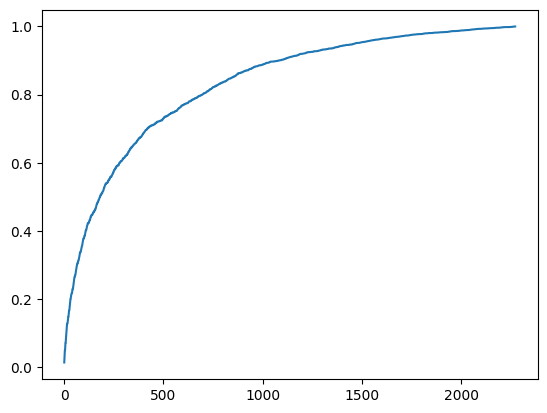

In [2]:
import matplotlib.pyplot as plt

n_classes = np.arange(1, y.shape[1] + 1)
n_samples = []
for n in n_classes:
    class_cts = np.array(y.sum(axis=0)).reshape(-1,)
    srt_zip = list(sorted(zip(class_cts, np.arange(y.shape[1])), reverse=True))
    top_n_class_idxs = np.array([elt[1] for elt in srt_zip[:n]])

    # Save y (sparse)
    yn = y[:, top_n_class_idxs]
    nz_rows = np.array(yn.sum(axis=1)).reshape(-1,) != 0
    yn = yn[nz_rows, :]

    n_samples.append(yn.shape[0])

frac_samples = np.array(n_samples) / y.shape[0]

plt.plot(n_classes, frac_samples)
plt.show()

In [2]:
thresh = 0.8
np.argwhere(frac_samples > thresh)[0]

NameError: name 'np' is not defined

In [6]:
top_n = 25
frac_samples[top_n], n_samples[top_n]

(0.16584699453551913, 607)

In [24]:
from collections import Counter

In [28]:
yn.sum(axis=0), Counter(np.array(yn.sum(axis=1)).reshape(-1,)), yn.shape

(matrix([[51, 48, 43, 42, 41]]), Counter({1: 143, 2: 41}), (184, 5))